# TOMATO DISEASE CLASSIFICATION

## Team Members - Abishek.s, Rohith.K, Aswin Kumar.S.K

## Importing necessary libraries and setting some parameters

In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS =50

## Reading the data

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle =True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [10]:
len(dataset)

141

## Visualizing the image data

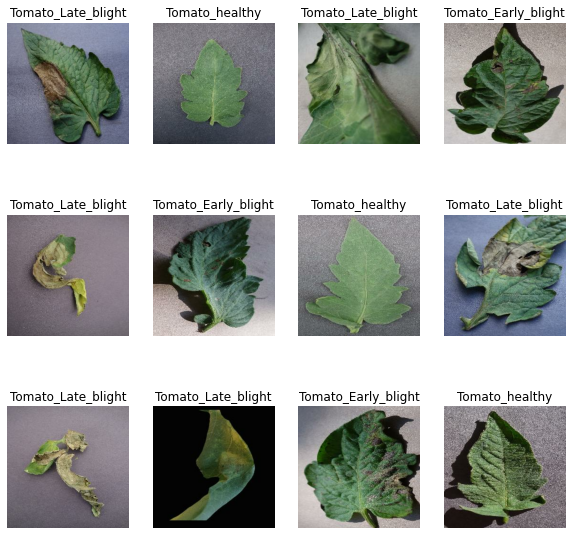

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):  # Gives us one batch
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

## Splitting the dataset for train, test and validation

In [12]:
train_size = 0.8  # 80%
len(dataset)*train_size

112.80000000000001

In [13]:
# Taking first 113 batches as TD
train_ds = dataset.take(112)
len(train_ds)

112

In [14]:
test_ds = dataset.skip(112)
len(test_ds)

29

In [15]:
val_size = 0.1
len(dataset)*val_size

14.100000000000001

In [16]:
# 10% of VALIDATION DATA
val_ds = test_ds.take(14)
len(val_ds)

14

In [17]:
# 10% of TEST DATA
test_ds = test_ds.skip(14)
len(test_ds)

15

In [18]:
# Making a dataset splitting function
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size= 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split* ds_size)
    val_size = int(val_split* ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

112

In [21]:
len(val_ds)

14

In [22]:
len(test_ds)    # 112+14+15 =141 :)

15

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

## Building CNN model

In [27]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape= input_shape)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [29]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ['accuracy']
)

## Model Training

In [30]:
history = model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data= val_ds
)

Epoch 1/50
112/112 [==============================] - 158s 1s/step - loss: 0.8051 - accuracy: 0.5971 - val_loss: 0.6063 - val_accuracy: 0.7522
Epoch 2/50
112/112 [==============================] - 139s 1s/step - loss: 0.6359 - accuracy: 0.7242 - val_loss: 0.5367 - val_accuracy: 0.7746
Epoch 3/50
112/112 [==============================] - 140s 1s/step - loss: 0.4571 - accuracy: 0.7898 - val_loss: 0.4319 - val_accuracy: 0.8237
Epoch 4/50
112/112 [==============================] - 140s 1s/step - loss: 0.4087 - accuracy: 0.8149 - val_loss: 0.5711 - val_accuracy: 0.7701
Epoch 5/50
112/112 [==============================] - 129s 1s/step - loss: 0.4012 - accuracy: 0.8278 - val_loss: 0.4202 - val_accuracy: 0.8326
Epoch 6/50
112/112 [==============================] - 129s 1s/step - loss: 0.3601 - accuracy: 0.8575 - val_loss: 0.5105 - val_accuracy: 0.7723
Epoch 7/50
112/112 [==============================] - 146s 1s/step - loss: 0.3009 - accuracy: 0.8721 - val_loss: 0.4690 - val_accuracy: 0.8482

## Testing our model

In [31]:
scores = model.evaluate(test_ds)       # AROUND (98% ACCURACY WE GOT)

15/15 [==============================] - 10s 232ms/step - loss: 0.0300 - accuracy: 0.9896


In [32]:
scores # loss,accuracy

[0.029991062358021736, 0.9895833134651184]

## Checking the history of our training

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 112}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
#history.history['accuracy']

## Visualizing the training and validation accuracy AND Loss

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

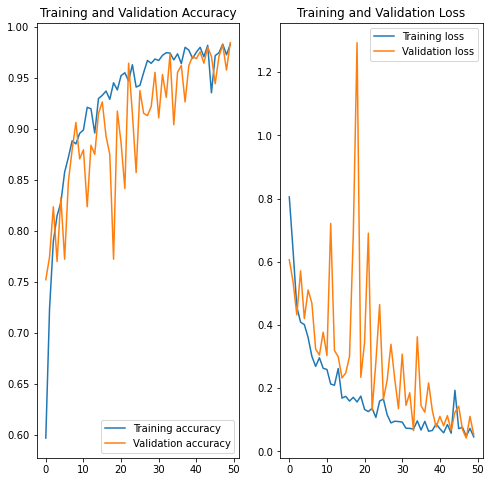

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label = 'Training accuracy')
plt.plot(range(EPOCHS),val_acc, label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label= 'Training loss')
plt.plot(range(EPOCHS),val_loss, label= 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predicting 

first image to predict
actual label: Tomato_Late_blight
predicted label: Tomato_Late_blight


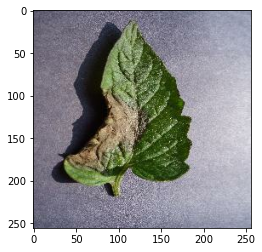

In [38]:
import numpy as np
for images_batch, label_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)  # creating a batch
    
    predictions = model.predict(img_array)
    
    predicted_class  = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

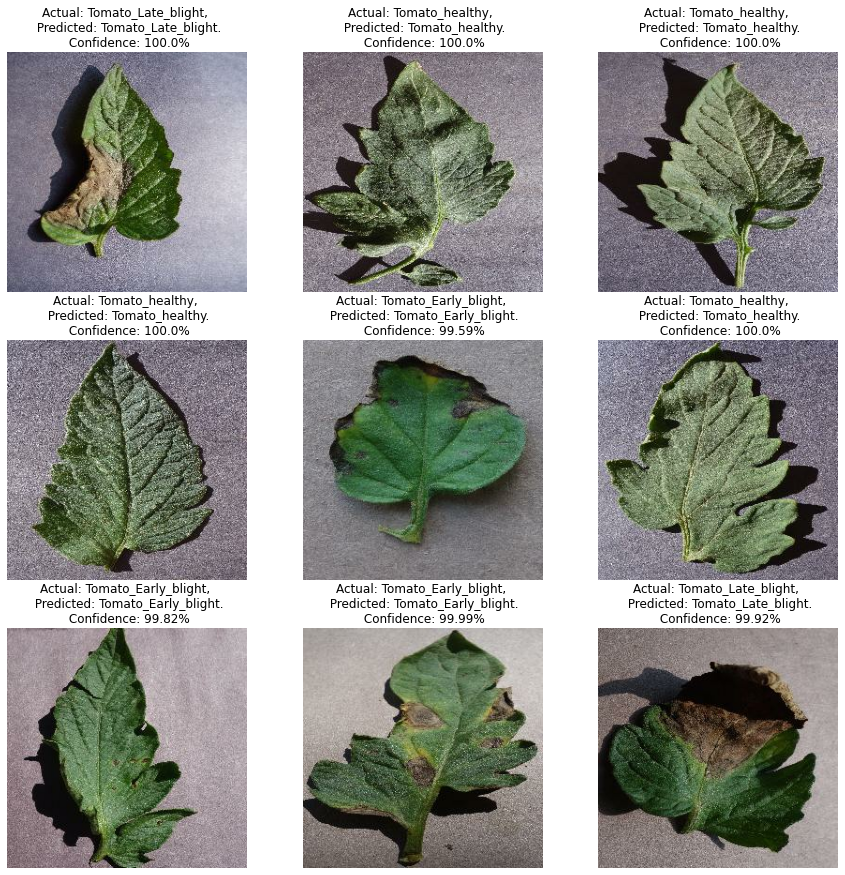

In [40]:
plt.figure(figsize =(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class , confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis('off')
        